# Lab 10 Clustering

The goal of Lab 10 | Clustering is to conduct **heirarchical** and **k-means** clustering using gene expression data. During the lab we will cover:
1. Data input and normalization
2. Distance matrices
3. Clustering methods
3. Heatmaps and PCA plots


## Assignment
Follow the instructions in this document and answer the questions in the cell below each question. Submit your answers by uploading a PDF file to gradescope. To generate the pdf, first export the notebook as HTML: >File, >Export to ..., >HTML. Then, open the HTML in a browser and use your browser to print to PDF.

Check to make sure all your cells have been run and the **results** displayed in the PDF file.   

Reminder, provide comments for any code you write to ensure partial credit. 

# Clustering overview

## Data input and normalization

Let's begin by reading in gene expression data using the pandas module, which enables us to easily read in a csv (comma separate values) file into a pandas dataframe. We will then normalize the data by columns.

Read more about pandas documentation here: http://pandas.pydata.org/pandas-docs/stable/

### DataFrame 
Pandas data frame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

Dict of 1D ndarrays, lists, dicts, or Series
 - 2-D numpy.ndarray
 - Structured or record ndarray
 - A Series
 - Another DataFrame
 
Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

In [1]:
import pandas as pd
import numpy as np

# Use index_col option to set the first column to row names
# By using pandas read_csv function we are generating a dataframe 'expd' with the pd namespace
expd = pd.read_csv('gene_expression.csv', index_col='UID')

Documentation is online (https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#csv-text-files) or by typing: `help(pd.read_csv)`  

Now lets look at the first three rows. Each column contains data for one experiment (sample) and each row contains data for one gene. The first row and top column are labels.

**NaN** is not a number and indicates no data in this case

The numeric expression data is log2(sample/reference), where the reference is a mixture of all the samples. Thus, values greater the 0 indicate higher expression than other experiments.


In [2]:
expd[:3]

,Heat Shock 05 minutes hs-1,Heat Shock 10 minutes hs-1,Heat Shock 15 minutes hs-1,Heat Shock 20 minutes hs-1,Heat Shock 30 minutes hs-1,Heat Shock 40 minutes hs-1,Heat Shock 60 minutes hs-1,Heat Shock 80 minutes hs-1,Heat Shock 000 minutes hs-2,Heat Shock 000 minutes hs-2,...,29 deg growth ct-1,37 deg growth ct-1,steady state 15 dec C ct-2,steady state 17 dec C ct-2,steady state 21 dec C ct-2,steady state 25 dec C ct-2,steady state 29 dec C ct-2,steady state 33 dec C ct-2,steady state 36 dec C ct-2,steady state 36 dec C ct-2 (repeat hyb)
UID,,,,,,,,,,,,,,,,,,,,,
YAL002W,-0.01,-0.30,0.23,0.01,-0.15,0.45,-0.04,0.14,-1.16,-0.14,...,-0.61,-0.37,-0.14,-0.22,-0.27,-0.08,-0.08,-0.17,0.18,-0.74
YAL003W,0.15,-0.07,-0.25,-0.30,-1.12,-0.67,-0.15,-0.43,0.63,0.92,...,0.79,-0.67,0.48,0.62,0.48,0.72,0.73,0.29,-0.30,-0.81
YAL005C,2.85,3.34,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-0.47,...,0.10,-0.45,0.74,-0.06,0.21,0.29,0.45,0.68,0.29,0.45


When you read a CSV, you get a DataFrame, semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations.

Get the first 10 entries using column label.

In [3]:
expd['Heat Shock 80 minutes hs-1'][:10]

UID
YAL002W    0.14
YAL003W   -0.43
YAL005C     NaN
YAL012W   -0.12
YAL025C   -0.34
YAL034C   -0.36
YAL035W   -0.58
YAL036C   -0.15
YAL038W   -0.51
YAL054C   -0.62
Name: Heat Shock 80 minutes hs-1, dtype: float64

To plot the first 100 entries we'll use Matplotlib: https://matplotlib.org/stable/users/index.html  

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

<AxesSubplot:xlabel='UID'>

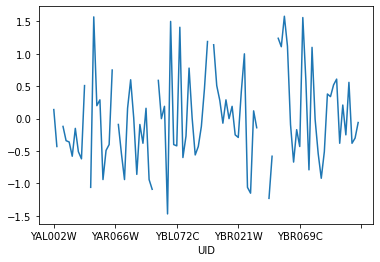

In [4]:
%matplotlib inline
expd['Heat Shock 80 minutes hs-1'][:100].plot()

### Slicing Subsets of Rows and Columns
We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

1. loc is primarily label based indexing. Integers may be used but they are interpreted as a label.
2. iloc is primarily integer based indexing

Getting specific values we can use loc or iloc

In [5]:
expd.iloc[:5,:3]

,Heat Shock 05 minutes hs-1,Heat Shock 10 minutes hs-1,Heat Shock 15 minutes hs-1
UID,,,
YAL002W,-0.01,-0.30,0.23
YAL003W,0.15,-0.07,-0.25
YAL005C,2.85,3.34,NaN
YAL012W,0.21,0.03,0.18
YAL025C,-1.89,-2.18,-3.47


In [6]:
expd.loc['YAL002W':'YAL005C','Heat Shock 05 minutes hs-1':'Heat Shock 20 minutes hs-1']

,Heat Shock 05 minutes hs-1,Heat Shock 10 minutes hs-1,Heat Shock 15 minutes hs-1,Heat Shock 20 minutes hs-1
UID,,,,
YAL002W,-0.01,-0.30,0.23,0.01
YAL003W,0.15,-0.07,-0.25,-0.30
YAL005C,2.85,3.34,NaN,NaN


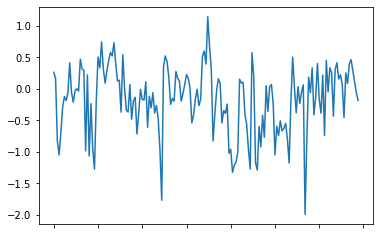

In [7]:
a = expd.iloc[:5,:].mean()
a.plot().tick_params(labelbottom=False)    
# Or more concisely expd.iloc[:5,:].mean().plot().tick_params(labelbottom=False) 

We can also use SciPy to cluster the genes

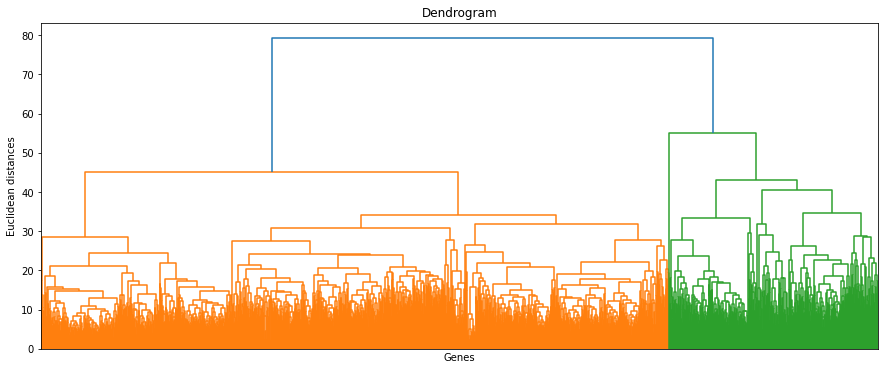

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Genes')
plt.ylabel('Euclidean distances')
dendro = dendrogram(linkage(expd.fillna(0), method='complete'))
plt.tick_params(labelbottom=False) 
plt.show()


# <font color=red> Question 1 </font> 
Normalize the gene expression data such that the mean of each column is 0 and the standard deviation of each column is 1.

Confirm your results by printing the average and standard deviations of the columns; they should be close to zero and one, respectively, which can be check by taking the mean of each column and then the mean of the means:

```
nexpd.mean().mean()
nexpd.std().mean()
```
where `nexpd` is a dataframe with the normalized data.  

(2 points)

In [27]:
# Answer


# <font color=red> Question 2 </font> 
Which sample (column) has the largest standard deviation in expression prior to normalization and what is its standard deviation? <br>
Hint: try using the idxmax and max functions:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html  
<br>
(2 points)

In [28]:
# Answer


## Distance matrices

A **distance matrix** is a square matrix (two-dimensional array) containing the distances, taken pairwise, between the elements of a set. The result is an N X N matrix given N elements.

Lets define a distance metric, e.g. euclidean distance, and then calculate a distance matrix for part of the normalized expression data.

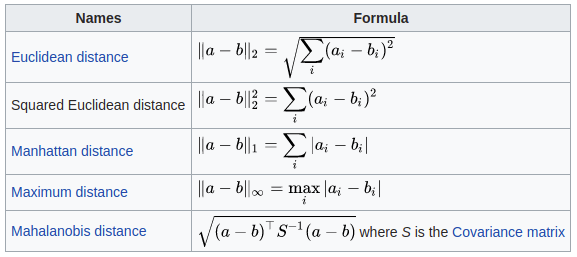

SciPy has built in functions to calculate a distance matrix:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

The pdist function returns a condensed distance matrix Y from X. For each i and j, the metric dist(X[i,:], X[j,:]) is computed and stored in Y as a vector. Thus, the distance is between all pairwise [i,j] rows of the input matrix X.

To get the NxN matrix you can use squareform to convert between the condensed and NxN matrix.

In [11]:
from scipy.spatial.distance import pdist, squareform
Y = pdist(expd.iloc[:10,:2], 'euclidean')
print('Squareform','\n',squareform(Y))
print('Condensed','\n',Y)

Squareform 
 [[0.         0.28017851 4.62916839 0.39661064 2.6587215  1.88063819
  0.31304952 1.8501081  0.33600595 0.31953091]
 [0.28017851 0.         4.34949422 0.11661904 2.93491056 1.60065612
  0.59169249 2.1253235  0.05656854 0.27892651]
 [4.62916839 4.34949422 0.         4.23387529 7.27585047 2.76210065
  4.93623338 6.43457069 4.29330875 4.4695078 ]
 [0.39661064 0.11661904 4.23387529 0.         3.04862264 1.48408221
  0.70830784 2.24129427 0.06324555 0.33136083]
 [2.6587215  2.93491056 7.27585047 3.04862264 0.         4.51459854
  2.36381048 1.16400172 2.99147121 2.80807763]
 [1.88063819 1.60065612 2.76210065 1.48408221 4.51459854 0.
  2.19207664 3.71764711 1.54547727 1.70742496]
 [0.31304952 0.59169249 4.93623338 0.70830784 2.36381048 2.19207664
  0.         1.53769308 0.64660653 0.58077534]
 [1.8501081  2.1253235  6.43457069 2.24129427 1.16400172 3.71764711
  1.53769308 0.         2.17848571 2.09389589]
 [0.33600595 0.05656854 4.29330875 0.06324555 2.99147121 1.54547727
  0.646

# <font color=red> Question 3 </font> 
Write a function to calculate a NxN distance matrix where N is the number of rows in the input matrix. Use the euclidean distance as the metric. However, you must handle NaN values (Not A Number), which occurs due to blank (missing data) in the original matrix. To do this, calculate the euclidean distance between two vectors but only include cases where both elements are not NaN.

If<br> 
`a = [0, NaN, 2,   5]
b = [2,   2, 3, NaN]`
<br> The euclidean distance[a,b] is sqrt( (2-0)^2 + (3-2)^2 ) = 2.2

Compute time (speed) can be an issue when you are calculating distance for a large matrix (1703 rows x 173 columns). The number of row[i] by row[j] distance calculates is 1703 choose 2 = 1,449,253. Each row is the sum of 173 calculations or a total of 250 million calculations.

One way to increase speed is using more efficient calculations. In general, adding two vectors is faster than iteratively summing each element.

Write your function such that it can complete the calculation in under a couple of minutes.  

You can check your work by running your function on `expd.iloc[:10,:2]` and comparing to pdist generated above.  

Apply your function to the normalized (Question 1) expression data and print rows 25:28 and columns 77:88 `Y[25:28,77:88]` where Y is a square distance matrix.

(3 points)



In [12]:
# To get started use the np.isnan() function to test for missing values
print(np.isnan(nexpd.iloc[8:11,0]))
print(np.isfinite(nexpd.iloc[8:11,0]))

def euclidean(X):
    # get number of columns
    c = np.shape(X)[0]
    out = np.zeros((c,c))
    # Replace the command below with your code such that NaN values are not included
    # so that the matrix is filled with numeric values.
    out = squareform(pdist(X, 'euclidean'))
    return(out)

# To convert pandas dataframe to numpy matrix use values:
print(euclidean(expd.iloc[0:3,0:2].values))

# What happens to NaN values

a = np.array([0, np.nan, 2,   5])
b = np.array([2,   2, 3, np.nan])
print(a-b)

# To get the sum:
print(sum(a-b))
print(np.nansum(a-b))

UID
YAL038W    False
YAL054C    False
YAL055W     True
Name: Heat Shock 05 minutes hs-1, dtype: bool
UID
YAL038W     True
YAL054C     True
YAL055W    False
Name: Heat Shock 05 minutes hs-1, dtype: bool
[[0.         0.28017851 4.62916839]
 [0.28017851 0.         4.34949422]
 [4.62916839 4.34949422 0.        ]]
[-2. nan -1. nan]
nan
-3.0


## Hierarchical Clustering

In the next few sections we will perform the linkage steps used in heirarchical clustering.

### Linkage using the distance matrix

Clustering involves calculating distances (above), and iteratively merging pairs of clusters until only one remains.

Here are some possible linkage functions:

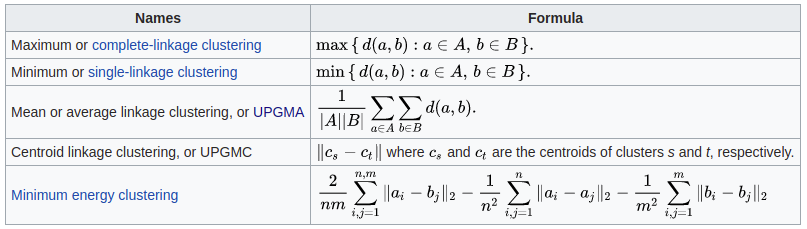



### Linkage method from ScyPy

SciPy will calculate linkage given a condensed distance matrix, and a linkage method.

It returns a 4 column by (n-1) row matrix (Z) that describes all the cluster mergers. Since there are 5 members in the distance matrix, there are 5-1 = 4 mergers.  


In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
Ylink = linkage(squareform(Y[:5,:5]), method='average')
print(pd.DataFrame(Ylink))
print(pd.DataFrame(Y[:5,:5]))

     0    1          2    3
0  1.0  3.0   9.685401  2.0
1  2.0  5.0  11.923947  3.0
2  0.0  6.0  13.871384  4.0
3  4.0  7.0  15.122183  5.0
           0          1          2          3          4
0   0.000000  14.730135  13.361814  13.522202  16.200864
1  14.730135   0.000000  12.464307   9.685401  11.851948
2  13.361814  12.464307   0.000000  11.383586  17.256734
3  13.522202   9.685401  11.383586   0.000000  15.179187
4  16.200864  11.851948  17.256734  15.179187   0.000000


The Z matrix contains a list of 4 mergers (rows), each of which have the following information in columns:
- cluster that is being merger (columns 0 and 1)
- distance betwen the merged clusters (column 2)
- number of original observations in the newly formed cluster (column 3)  

So, the first row tells us that cluster 1 and 3 are merged, have a distance of 9.6, and have two original samples.  

Because we made a new cluster, it is now referred to as cluster 5 and the second row tells us that cluster 5 is merged with cluster 2 to make cluster 6.


A dendrogram (tree) can also be graphed using the output from linkage.

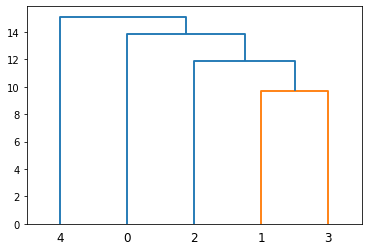

In [17]:
dendrogram(Ylink)
Ydend = dendrogram(Ylink)

# <font color=red> Question 4 </font> 
What are the two conditions (column names) that are most similar and most different in expression as measured by euclidean distance of the normalized data?

You can use `list(expd)` to access a vector of column names.  

Print the distance along with each condition for each (similar, different).  

(3 points)

In [29]:
# Answer


## Heatmap

By clustering the columns and rows we can produce a heatmap. This can be done using seaborns clustermap function. The resulting heatmap shows genes (rows) and experiments (columns) with expression levels scaled by color. Note that the font size is too large to accurately show all the labels.

/home/jfay/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


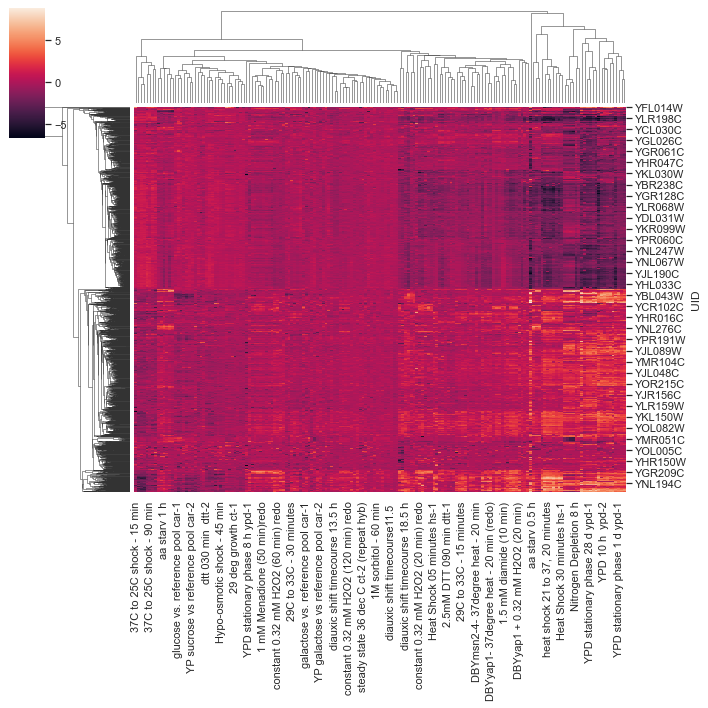

In [19]:
import seaborn as sns; sns.set(color_codes=True)
g = sns.clustermap(expd.fillna(0))

# Kmeans clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

<h4><center>Twenty points and their Voroni cells</center> </h4>
<img src="images/voroni.png" > 

The problem is computationally difficult (NP-hard); however, there are efficient heuristic algorithms that are commonly employed and converge quickly to a local optimum. These are usually similar to the expectation-maximization algorithm for mixtures of Gaussian distributions via an iterative refinement approach employed by both k-means and Gaussian Mixture Modeling. 

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means because of the k in the name. One can apply the 1-nearest neighbor classifier on the cluster centers obtained by k-means to classify new data into the existing clusters.

Given a set of observations $ (x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets $ S = {S_1, S_2, …, S_k} $ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922" >

where $ μ_i $ is the mean of points in $ S_i $. This is equivalent to minimizing the pairwise squared deviations of points in the same cluster:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9fb2388a00fcf4f1df3117883fccd0c4028da33d">


Because the total variance is constant, this is also equivalent to maximizing the squared deviations between points in different clusters (between-cluster sum of squares, BCSS).


The most common algorithm uses an iterative refinement technique, often referred to as Lloyd's algorithm:

Given an initial set of k means $ m_1^{(1)},…,m_k^{(1)} $ (see below), the algorithm proceeds by alternating between two steps:
 - **Assignment step**: Assign each observation to the cluster whose mean has the least squared Euclidean distance, this is intuitively the "nearest" mean.
 
 For each observation $x_p $, assign it to cluster $ S_i $ such that $ \Vert {x_p - m_i } \Vert^2 \le \Vert x_p - m_j \Vert ^2 $ for j = 1:k
 

 - **Update step**: Calculate the new means to be the centroids of the observations in the new clusters.
 
 Update the centroids $$ m_i = \frac {1} {|S_i|} \sum _{x_j \in S_i}{x_j} $$

## Plotting K-means clusters

When K-means is conducted on 2-D data, there is a good correspondence between the cluster assignment and the projection of the data in X-Y coordinates.

Lets use SciKit's K-means clustering function to cluster the first two columns of the expression data, then plot the first two columns, labelling the points with the cluster assignment.

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Unfortunately, missing data are not handled so we will first have to replace NaN with 0.

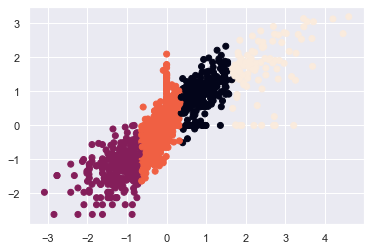

In [20]:
from sklearn.cluster import KMeans

# Fill in nan with 0
nexpd0 = nexpd.fillna(0).values

# Fit k-means models with 4 clusters using first two columns
model = KMeans(n_clusters=4).fit(nexpd0[:,:1])

# Plot first two columns, color using model labels
plt.scatter(nexpd0[:,0], nexpd0[:,1], c=model.labels_.astype(float))

However, if we plot the first two columns with K-means clustering of all the data, we can see the clusters do not correspond so well to the data in the first two columns. This is expected since the clusters are based on all columns.

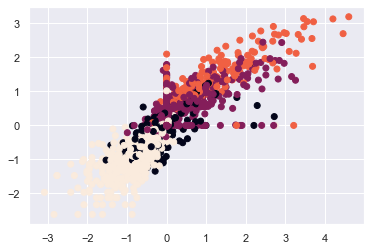

In [21]:
# Fit k-means models with 4 clusters using first two columns
model = KMeans(n_clusters=4).fit(nexpd0)
plt.scatter(nexpd0[:,0], nexpd0[:,1], c=model.labels_.astype(float))

### PCA to visualize K-means clusters

Principal component analysis (PCA) is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. We will learn more about PCA at another time. For now, we will just use it for visualizing n-dimensional data.

Using SciKit's PCA function, lets plot the K-means cluster assignments.

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

As you will see, the visualization is much improved.

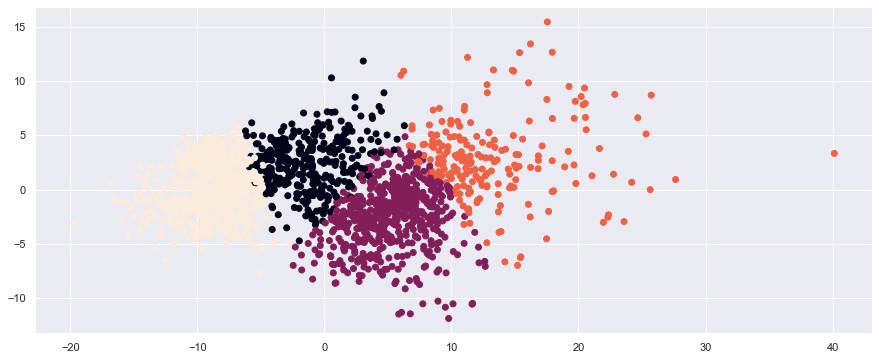

In [22]:
from sklearn.decomposition import PCA

# Find two principle components
pc = PCA(n_components=2).fit_transform(nexpd0)

# Plot first vs second component, with color indicating the 4 clusters.
plt.figure(figsize=(15,6))
plt.scatter(pc[:,0], pc[:,1], c=model.labels_.astype(float))

# <font color=red> Question 5 </font>
Write a function to assign each gene in nexpd0 to a cluster, with known centroids. Use the template provided below for initial conditions and print the number of genes assigned to each of the four centroids.  

(3 points)

In [23]:
# For our starting conditions we will use the vector of expression data from four genes.
# We will store the centroids in a 4(rows) x 173(column) matrix
centroids = nexpd0[[312,518,633,899],:]

# We will store our assignments in a numpy array, with length equal to the number of genes.
# The labels will be [0,1,2,3] to correspond to the four centroids
km = np.zeros(nexpd0.shape[0])

# Fill in the function below to take the centroids and data and output the assignments
def assign(data,cent):
    # k is a vector of labels [0,1,2,3] with length equal to the number of genes 
    k = np.zeros(data.shape[0])
    # make assignments
    return(k)

# Print the counts of the assignments
# use print( np.unique(k, return_counts=True) )


# <font color=red> Question 6 </font>
Write a function to update the centroids (means) using each gene's assignment from Question 5 and print the centroid means.

(3 points)

In [30]:
# Answer


# <font color=red> Question 7 </font>
Implement K-means clustering using the functions in Questions 5 and 6. Use the starting conditions in Question 5. Iterate through K-means until convergence, i.e. there is no change in the assignments. Print the number of genes assigned to each centroid and the centroid means.   

Conduct PCA analysis and plot the first and second component with colors corresponding to the K-means cluster assignments.

(4 points)

In [31]:
# Answer
